In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import itertools

## Загрузка DF и общая информация о нем

In [11]:
data = pd.read_csv('movie_bd_v5.csv', encoding = "utf-8")
# encoding
data.director = data.director.str.encode('latin1').str.decode('utf8') # worked for "director" column

In [12]:
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
1880,tt0190374,35000000,15185241,Dungeons & Dragons,Justin Whalin|Jeremy Irons|Thora Birch|Bruce P...,Courtney Solomon,This is no game.,The classic role-playing game comes to life in...,107,Action|Adventure|Fantasy|Science Fiction,New Line Cinema|Silver Pictures|Sweetpea Enter...,12/8/2000,3.9,2000
694,tt1031969,15000000,8762890,The Rocker,Rainn Wilson|Josh Gad|Christina Applegate|Emma...,Peter Cattaneo,Opportunity rocks.,"Rob ""Fish"" Fishman is the drummer in '80s hair...",102,Comedy|Music,Fox Atomic,8/20/2008,5.4,2008
41,tt1655441,25000000,42629776,The Age of Adaline,Blake Lively|Michiel Huisman|Harrison Ford|Ell...,Lee Toland Krieger,Love is timeless.,After 29-year-old Adaline recovers from a near...,112,Fantasy|Drama|Romance,Lakeshore Entertainment|Sidney Kimmel Entertai...,4/16/2015,7.3,2015
1341,tt0358082,75000000,260696994,Robots,Robin Williams|Ewan McGregor|Halle Berry|Mel B...,Chris Wedge|Carlos Saldanha,You can shine no matter what you're made of.,Rodney Copperbottom is a young robot inventor ...,91,Animation|Comedy|Family|Science Fiction,Blue Sky Studios|Twentieth Century Fox Animation,3/11/2005,5.9,2005
1138,tt0327850,85000000,80916492,The Rundown,Dwayne Johnson|Seann William Scott|Rosario Daw...,Peter Berg,cut to the chase,"When Travis, the mouthy son of a criminal, dis...",104,Adventure|Action|Comedy|Thriller,Columbia Pictures|Universal Pictures|WWE Studios,9/26/2003,6.3,2003


In [13]:
data.shape

(1889, 14)

In [14]:
data.dtypes

imdb_id                  object
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
tagline                  object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [15]:
data.isna().sum()

imdb_id                 0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

In [16]:
data.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'tagline', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year'],
      dtype='object')

# Предобработка

In [17]:
answers = {} # создадим словарь для ответов

### Переводим дату в datetime формат

In [18]:
data["release_date"] = pd.to_datetime(data["release_date"])

### Добавляем колонку month

In [19]:
data["month"] = data["release_date"].dt.month

### Добавляем колонку profit = revenue - budget

In [20]:
data["profit"] = data["revenue"] - data["budget"]

### Уберем ненужные колонки

In [79]:
data_new = data.drop(columns=["imdb_id", "tagline"])

In [80]:
data_new.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'month', 'profit'],
      dtype='object')

### Извлечем информацию о жанрах для каждой картины

In [22]:
# сперва строки в колонке genres преобразуем в списки
data_new.genres = data_new.genres.apply(lambda x: x.split("|"))

# альтернативный метод без использования функции: метод assign
# data_new = data_new.assign(genres=data_new.genres.str.split('|'))

# применим метод explode, чтобы каждой строке соответствовал только один жанр
data_gen = data_new.explode("genres", ignore_index=True)

In [23]:
# смотрим, что получилось
data_gen.head(6)

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,6,1363528810
1,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,6,1363528810
2,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,6,1363528810
3,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,6,1363528810
4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,5,228436354
5,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,5,228436354


### Извлечем информацию об режиссерах для каждой картины

In [24]:
data_new = data_new.assign(director=data_new.director.str.split('|'))

In [25]:
data_dir = data_new.explode("director", ignore_index=True)

### ... о студиях

In [26]:
data_new = data_new.assign(production_companies=data_new.production_companies.str.split('|'))
data_comp = data_new.explode("production_companies", ignore_index=True)

### ... и об актерах

In [27]:
data_new = data_new.assign(cast=data_new.cast.str.split('|'))
data_cast = data_new.explode("cast", ignore_index=True)

### Для вопроса 14: Оставим только фильмы с жанром Action

In [30]:
data_dir.genres = data_dir.genres.apply(lambda x: "|".join(x))

In [31]:
data_dir_action = data_dir[data_dir.genres.str.contains("Action")]

### Для вопроса 17: Оставим только фильмы, где снимался N.Cage

In [33]:
data_gen_cage = data_gen[data_gen.cast.str.contains("Nicolas Cage")]

In [34]:
data_gen_cage.shape

(93, 14)

### Для вопроса 24: Добавим столбец для количества символов в названии фильма

In [35]:
data_comp["title_len"] = data_comp.original_title.apply(lambda x: len(x))

### Для вопроса 25: Добавим столбец для количества слов в описании фильма

In [36]:
data_comp["overview_len"] = data_comp.overview.apply(lambda x: len(x.split()))

In [37]:
data_comp.shape

(6078, 16)

### Для вопроса 27

In [88]:
# Будем работать с серией data["cast"]
data_cast_ser = data.cast

In [91]:
# Преобразуем строки в множества
data_cast_ser = data_cast_ser.apply(lambda x: set(x.split("|")))

In [93]:
# С помощью функции combinations из библиотеки itertools сравним множества, найдем их пересечения 
# и поместим эти пересечения в список
lst = []
for set1, set2 in itertools.combinations(data_cast_ser, 2):
    lst.append(set1.intersection(set2))
    
    

In [95]:
# Создадим новую серию из полученного списка
data_cast_ser_int = pd.Series(lst)

# Почистим новую серию: уберем пустые множества, а также множества с одним элементом
data_cast_ser_int = data_cast_ser_int.apply(lambda x: x if len(x) > 1 else np.NaN).dropna()


In [97]:
# В новой серии остались множества с двумя и более актерами, снимавшихся в двух и более фильмах вместе
data_cast_ser_int.head(10)

3903     {Kate Winslet, Shailene Woodley, Miles Teller,...
3949                      {Ansel Elgort, Shailene Woodley}
7879         {Michelle Rodriguez, Vin Diesel, Paul Walker}
8117         {Michelle Rodriguez, Vin Diesel, Paul Walker}
8392             {Vin Diesel, Paul Walker, Dwayne Johnson}
8838             {Vin Diesel, Paul Walker, Dwayne Johnson}
9794                        {Leonardo DiCaprio, Tom Hardy}
19798                        {Ralph Fiennes, Daniel Craig}
24521                          {Adam Sandler, Kevin James}
25475                          {Adam Sandler, Kevin James}
dtype: object

# 1. У какого фильма из списка самый большой бюджет?

In [26]:
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides'

In [48]:
data_new[data_new.budget == data_new.budget.max()].original_title

723    Pirates of the Caribbean: On Stranger Tides
Name: original_title, dtype: object

##### ВАРИАНТ 2

In [28]:
data_new.sort_values("budget", ascending=False).head(3)

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
723,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,"[Johnny Depp, PenÃ©lope Cruz, Geoffrey Rush, I...",[Rob Marshall],Captain Jack Sparrow crosses paths with a woma...,136,"[Adventure, Action, Fantasy]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2011-05-11,6.3,2011,5,641683000
1669,300000000,961000000,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"Captain Barbossa, long believed to be dead, ha...",169,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,6.8,2007,5,661000000
14,280000000,1405035767,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],When Tony Stark tries to jumpstart a dormant p...,141,"[Action, Adventure, Science Fiction]","[Marvel Studios, Prime Focus, Revolution Sun S...",2015-04-22,7.4,2015,4,1125035767


54310829.64


<AxesSubplot:ylabel='Frequency'>

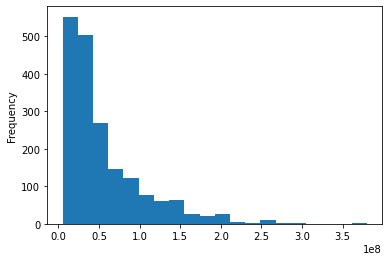

In [46]:

data_new["budget"].plot(kind="hist", bins=20)

# 2. Какой фильм самый продолжительный?

In [29]:
answers['2'] = 'Gods and Generals'

In [30]:
data_new.sort_values("runtime", ascending=False).head(3)

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
1157,56000000,12923936,Gods and Generals,"[Stephen Lang, Jeff Daniels, Robert Duvall, Ke...",[Ronald F. Maxwell],The film centers mostly around the personal an...,214,"[Drama, History, War]","[Turner Pictures, Antietam Filmworks]",2003-02-21,5.8,2003,2,-43076064
1081,94000000,1118888979,The Lord of the Rings: The Return of the King,"[Elijah Wood, Ian McKellen, Viggo Mortensen, L...",[Peter Jackson],Aragorn is revealed as the heir to the ancient...,201,"[Adventure, Fantasy, Action]","[WingNut Films, New Line Cinema]",2003-12-01,7.9,2003,12,1024888979
1736,67000000,25037897,Grindhouse,"[Kurt Russell, ZoÃ« Bell, Rosario Dawson, Vane...","[Robert Rodriguez, Eli Roth, Quentin Tarantino...",Two full length feature horror movies written ...,191,"[Thriller, Action, Horror]","[Big Talk Productions, Yer Dead Productions, W...",2007-04-06,6.5,2007,4,-41962103


# 3. Какой из фильмов самый короткий (в минутах)?





In [31]:
answers['3'] = 'Winnie the Pooh'

In [47]:
data_new[data_new.runtime == data_new.runtime.min()].original_title

768    Winnie the Pooh
Name: original_title, dtype: object

# 4. Какова средняя длительность фильмов?


In [33]:
answers['4'] = '110'

110.0


<AxesSubplot:ylabel='Frequency'>

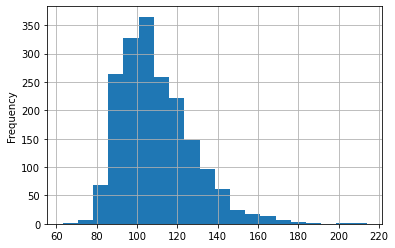

In [78]:
# График распределения продолжительности картин
print(data_new.runtime.mean().round())
data_new["runtime"].plot(kind="hist", bins=20, grid=True)

<AxesSubplot:>

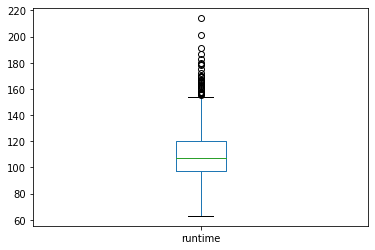

In [50]:
data_new["runtime"].plot(kind="box")

# 5. Каково медианное значение длительности фильмов? 

In [35]:
answers['5'] = '107'

In [36]:
data_new.runtime.median()

107.0

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [37]:
answers['6'] = 'Avatar'

In [38]:
data_new.sort_values("profit", ascending = False).head(3)

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
239,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"In the 22nd century, a paraplegic Marine is di...",162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,7.1,2009,12,2544505847
3,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,7.5,2015,12,1868178225
0,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,6.5,2015,6,1363528810


# 7. Какой фильм самый убыточный? 

In [39]:
answers['7'] = 'The Lone Ranger'

In [40]:
data_new[data_new.profit == data_new.profit.min()]

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
1245,255000000,89289910,The Lone Ranger,"[Johnny Depp, Armie Hammer, William Fichtner, ...",[Gore Verbinski],The Texas Rangers chase down a gang of outlaws...,149,"[Action, Adventure, Western]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2013-07-03,6.0,2013,7,-165710090


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [41]:
answers['8'] = '1478'

In [42]:
data_new[data_new.revenue > data_new.budget].original_title.count()

1478

##### ВАРИАНТ 2

In [43]:
data_new.query("revenue > budget").original_title.count()

1478

##### ВАРИАНТ 3

In [51]:
data_new[lambda x: x["revenue"] > x["budget"]].original_title.count()

1478

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [44]:
answers['9'] = 'The Dark Knight'

In [45]:
data_new[data_new.release_year == 2008].sort_values("revenue", ascending=False).head(3)

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
599,185000000,1001921825,The Dark Knight,"[Christian Bale, Michael Caine, Heath Ledger, ...",[Christopher Nolan],Batman raises the stakes in his war on crime. ...,152,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Warner Bros., ...",2008-07-16,8.1,2008,7,816921825
603,185000000,786636033,Indiana Jones and the Kingdom of the Crystal S...,"[Harrison Ford, Cate Blanchett, Shia LaBeouf, ...",[Steven Spielberg],"Set during the Cold War, the Soviets â€“ led b...",122,"[Adventure, Action]","[Lucasfilm, Paramount Pictures]",2008-05-21,5.6,2008,5,601636033
606,130000000,631744560,Kung Fu Panda,"[Jack Black, Dustin Hoffman, Angelina Jolie, J...","[Mark Osborne, John Stevenson]","When the Valley of Peace is threatened, lazy P...",90,"[Animation, Family]",[DreamWorks Animation],2008-06-04,6.8,2008,6,501744560


<AxesSubplot:>

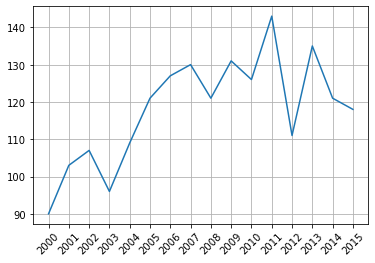

In [71]:
# График количество снятых фильмов по годам
years = range(2000, 2016)
data_new.release_year.value_counts().sort_index().plot(grid=True, xticks=years, rot=45)

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [46]:
answers['10'] = 'The Lone Ranger'

In [47]:
data_new.query("2012 <= release_year <= 2014").sort_values("profit").head(3)

,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
1245,255000000,89289910,The Lone Ranger,"[Johnny Depp, Armie Hammer, William Fichtner, ...",[Gore Verbinski],The Texas Rangers chase down a gang of outlaws...,149,"[Action, Adventure, Western]","[Walt Disney Pictures, Jerry Bruckheimer Films...",2013-07-03,6.0,2013,7,-165710090
1214,130000000,61648500,R.I.P.D.,"[Jeff Bridges, Ryan Reynolds, Kevin Bacon, Ste...",[Robert Schwentke],A recently slain cop joins a team of undead po...,96,"[Fantasy, Action, Comedy, Crime]","[Universal Pictures, Original Film, Dark Horse...",2013-07-18,5.3,2013,7,-68351500
1007,60000000,8106475,Upside Down,"[Kirsten Dunst, Jim Sturgess, Timothy Spall, J...",[Juan Diego Solanas],In an alternate universe where twinned worlds ...,104,"[Romance, Science Fiction, Drama, Fantasy]","[Onyx Films, Studio 37, Jouror Productions, Fr...",2012-09-27,6.1,2012,9,-51893525


In [48]:
# data_new.query("2012 <= release_year <= 2014").sort_values("profit").head(3)

<AxesSubplot:xlabel='release_year'>

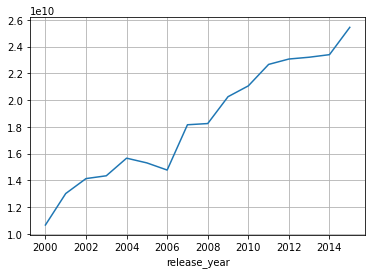

In [66]:
# График суммарных сборов по годам
data_new.groupby("release_year")["revenue"].sum().sort_index().plot(grid=True)

# 11. Какого жанра фильмов больше всего?

In [49]:
answers['11'] = 'Drama'

In [50]:
data_gen.genres.value_counts()

Drama              782
Comedy             683
Thriller           596
Action             582
Adventure          415
Crime              315
Romance            308
Family             260
Science Fiction    248
Fantasy            222
Horror             176
Mystery            168
Animation          139
Music               64
History             62
War                 58
Western             19
Documentary          8
Foreign              2
Name: genres, dtype: int64

ВАРИАНТ 2

<AxesSubplot:>

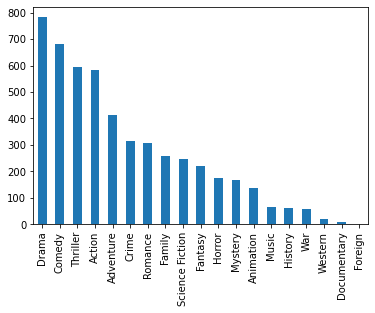

In [65]:
# График с самыми популярными жанрами (столбцы)
data_gen.genres.value_counts().plot(kind="bar", grid=False)

# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [51]:
answers['12'] = 'Drama'

In [52]:
data_gen[data_gen.profit > 0].genres.value_counts()

Drama              560
Comedy             551
Thriller           446
Action             444
Adventure          337
Romance            242
Crime              231
Family             226
Science Fiction    195
Fantasy            188
Horror             150
Animation          120
Mystery            119
Music               47
History             46
War                 41
Western             12
Documentary          7
Name: genres, dtype: int64

# 13. У какого режиссера самые большие суммарные кассовые сбооры?

In [53]:
answers['13'] = 'Peter Jackson'

In [107]:
data_dir.groupby("director")["revenue"].sum().sort_values().tail(3)

director
David Yates          4154295625
Christopher Nolan    4167548502
Peter Jackson        6490593685
Name: revenue, dtype: int64

In [ ]:
# График с самыми тратящими (budget) / учпешными (profit) режиссерами (столбцы горизонтально)

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [55]:
answers['14'] = 'Robert Rodriguez'

In [56]:
data_dir_action.director.value_counts().head()

Robert Rodriguez      9
Paul W.S. Anderson    7
Michael Bay           7
Ridley Scott          6
Antoine Fuqua         6
Name: director, dtype: int64

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [57]:
answers['15'] = 'Chris Hemsworth'

In [58]:
data_cast[data_cast.release_year == 2012].groupby("cast")["revenue"].sum().sort_values(ascending=False).head()

cast
Chris Hemsworth      2027450773
Denis Leary          1629460639
Anne Hathaway        1522851057
Chris Evans          1519557910
Robert Downey Jr.    1519557910
Name: revenue, dtype: int64

# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [59]:
answers['16'] = '_____'

In [83]:
# высокобюджетный: revenue > revenue.mean()
data_cast[data_cast.budget > data_cast.budget.mean()].groupby("cast")["original_title"].count().sort_values(ascending=False).head()

cast
Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Eddie Murphy         15
Samuel L. Jackson    15
Name: original_title, dtype: int64

In [61]:
data_cast[(data_cast.revenue > data_cast.revenue.mean()) & (data_cast.cast.str"Tom Cruise")].original_title.count()

14

In [ ]:
# График самых часто снимающихся актеров


In [ ]:
# График самых прибыльных актеров

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [299]:
answers['17'] = 'Action'

In [300]:
data_gen_cage.genres.value_counts()

Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Mystery             3
Animation           3
Family              3
History             2
Horror              1
Romance             1
War                 1
Name: genres, dtype: int64

# 18. Самый убыточный фильм от Paramount Pictures

In [301]:
answers['18'] = 'K-19: The Widowmaker'

In [302]:
data_comp[data_comp.production_companies == "Paramount Pictures"].groupby("original_title")["profit"].sum().sort_values()

original_title
K-19: The Widowmaker                                  -64831034
Timeline                                              -60519261
Next                                                  -51788987
Alfie                                                 -46604061
Twisted                                               -24805000
                                                        ...    
Mission: Impossible - Ghost Protocol                  549713380
Transformers                                          559709780
Indiana Jones and the Kingdom of the Crystal Skull    601636033
Transformers: Revenge of the Fallen                   686297228
Transformers: Dark of the Moon                        928746996
Name: profit, Length: 122, dtype: int64

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [303]:
answers['19'] = '2015'

In [304]:
data_new.groupby("release_year")["revenue"].sum().sort_values(ascending=False).head()

release_year
2015    25449202382
2014    23405862953
2013    23213799791
2012    23079001687
2011    22676791872
Name: revenue, dtype: int64

# 20. Какой самый прибыльный год для студии Warner Bros?

In [305]:
answers['20'] = '2014'

In [82]:
data_comp[data_comp.production_companies.str.contains("Warner Bros.")].groupby("release_year")["profit"].sum().sort_values(ascending=False).head()

release_year
2014    2292949646
2007    2201675217
2008    2134595031
2010    1974712985
2011    1871393682
Name: profit, dtype: int64

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [307]:
answers['21'] = 'Сентябрь'

In [308]:
data_new.month.value_counts()

9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: month, dtype: int64

##### ВАРИАНТ 2

In [309]:
data_new.groupby("month")["original_title"].count().sort_values(ascending=False)

month
9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: original_title, dtype: int64

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [310]:
answers['22'] = '450'

In [311]:
data_new[data_new.month.isin([6, 7, 8])].original_title.count()

450

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [313]:
answers['23'] = 'Aaron Seltzer'

In [85]:
data_dir[data_dir.month.isin([12, 1, 2])].groupby("director")["original_title"].count().sort_values(ascending=False)[:4]

director
Peter Jackson        7
Steven Soderbergh    6
Clint Eastwood       6
Martin Scorsese      4
Name: original_title, dtype: int64

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [0]:
answers['24'] = 'Four By Two Productions'

In [361]:
data_comp.groupby("production_companies")["title_len"].mean().sort_values(ascending=False)

production_companies
Four By Two Productions       83.0
Jim Henson Company, The       59.0
Dos Corazones                 47.0
Museum Canada Productions     46.0
Polsky Films                  46.0
                              ... 
Everest Entertainment          3.0
Berlanti Productions           3.0
XM2 Productions                2.0
Ixtlan Productions             2.0
Global Entertainment Group     2.0
Name: title_len, Length: 1771, dtype: float64

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [0]:
answers['25'] = 'Midnight Picture Show'

In [371]:
data_comp.groupby("production_companies")["overview_len"].mean().sort_values(ascending=False)

production_companies
Midnight Picture Show                    175.0
Room 9 Entertainment                     161.0
98 MPH Productions                       159.0
Heineken Branded Entertainment           159.0
Brookwell-McNamara Entertainment         156.0
                                         ...  
London Boulevard                          13.0
Phantom Four                              13.0
Henceforth                                13.0
Empire Pictures                           11.0
Motion Picture Corporation of America     11.0
Name: overview_len, Length: 1771, dtype: float64

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [ ]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave'

In [328]:
list(data_new.sort_values("vote_average", ascending=False).head(int(0.01*len(data_new)))["original_title"])

['The Dark Knight',
 'Interstellar',
 'The Imitation Game',
 'Inside Out',
 'Room',
 'The Wolf of Wall Street',
 'Gone Girl',
 '12 Years a Slave',
 'Guardians of the Galaxy',
 'The Lord of the Rings: The Return of the King',
 'Memento',
 'Inception',
 'The Pianist',
 'The Grand Budapest Hotel',
 'Her',
 'Spotlight',
 'Big Hero 6',
 'The Fault in Our Stars']

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [105]:
answers['27'] = 'Daniel Radcliffe & Rupert Grint'

In [98]:
data_cast_ser_int.value_counts(ascending=False)

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{Rupert Grint, Emma Watson, Daniel Radcliffe}                                             25
{Helena Bonham Carter, Johnny Depp}                                                       15
{Ben Stiller, Owen Wilson}                                                                13
{Adam Sandler, Kevin James}                                                                8
{Julia Roberts, Brad Pitt}                                                                 5
{Robert Pattinson, Kristen Stewart, Peter Facinelli, Taylor Lautner}                       5
{Chris Evans, Scarlett Johansson}                                                          5
{Matt Damon, George Clooney}                                                               5
{Paul Rudd, Steve Carell}                                                                  5
{Ian McKellen, Hugh Jackman}                                                               4
{Brad Pitt, George Clooney}                                           

In [99]:
# Чтобы jupyter не ругался, можно перевести множества в строки
data_cast_ser_int_str = data_cast_ser_int.apply(lambda x: "|".join(list(x))).value_counts(ascending=False)

In [100]:
data_cast_ser_int_str.head()

Rupert Grint|Emma Watson|Daniel Radcliffe    25
Helena Bonham Carter|Johnny Depp             15
Ben Stiller|Owen Wilson                      13
Adam Sandler|Kevin James                      8
Paul Rudd|Steve Carell                        5
dtype: int64

#### Примечание к вопросу 27

In [104]:
# Проверим, в скольких фильмах снимались Daniel Radcliffe и Rupert Grint вместе
data_radcliffe_grint = data[(data.cast.str.contains("Daniel Radcliffe")) & (data.cast.str.contains("Rupert Grint"))]
data_radcliffe_grint

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,month,profit
242,tt0417741,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,Dark Secrets Revealed,"As Harry begins his sixth year at Hogwarts, he...",153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,2009-07-07,7.3,2009,7,683959197
374,tt0926084,250000000,954305868,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,David Yates,One Wayâ€¦ One Fateâ€¦ One Hero.,"Harry, Ron and Hermione walk away from their l...",146,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,2010-10-17,7.4,2010,10,704305868
497,tt0241527,125000000,976475550,Harry Potter and the Philosopher's Stone,Daniel Radcliffe|Rupert Grint|Emma Watson|John...,Chris Columbus,Let the Magic Begin.,Harry Potter has lived under the stairs at his...,152,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films,2001-11-16,7.2,2001,11,851475550
722,tt1201607,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,7.7,2011,7,1202817822
864,tt0295297,100000000,876688482,Harry Potter and the Chamber of Secrets,Daniel Radcliffe|Rupert Grint|Emma Watson|Kenn...,Chris Columbus,Hogwarts is back in session.,"Ignoring threats to his life, Harry returns to...",161,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films|MIRACL...,2002-11-13,7.2,2002,11,776688482
1312,tt0330373,150000000,895921036,Harry Potter and the Goblet of Fire,Daniel Radcliffe|Rupert Grint|Emma Watson|Ralp...,Mike Newell,Dark And Difficult Times Lie Ahead.,"Harry starts his fourth year at Hogwarts, comp...",157,Adventure|Fantasy|Family,Patalex IV Productions Limited|Warner Bros.|He...,2005-11-05,7.3,2005,11,745921036
1560,tt0304141,130000000,789804554,Harry Potter and the Prisoner of Azkaban,Daniel Radcliffe|Rupert Grint|Emma Watson|Gary...,Alfonso Cuarón,Something wicked this way comes.,"Harry, Ron and Hermione return to Hogwarts for...",141,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films|P of A...,2004-05-31,7.4,2004,5,659804554
1670,tt0373889,150000000,938212738,Harry Potter and the Order of the Phoenix,Daniel Radcliffe|Rupert Grint|Emma Watson|Mich...,David Yates,Evil Must Be Confronted.,Returning for his fifth year of study at Hogwa...,138,Adventure|Fantasy|Family|Mystery,Cool Music|Warner Bros.|Heyday Films|Harry Pot...,2007-06-28,7.2,2007,6,788212738


In [ ]:
# Всего в восьми экранизациях романов Дж.Роулинг о Гарри Поттере.
# Тогда откуда число 25 в ниших результатах? 
# Функция "combinations('ABCD', 2)" возвращает все парные, неповторяющиеся комбинации для заданных элеметов
# В случае с n=8 элементов, должно быть 8! / 2! / (8-2)! = 28 комбинаций.
# Мне не удалось выяснить, куда исчезли три комбинации из моих результатов...
# К счастью, это не повлияло на правильность ответа.

ВАРИАНТ 2

# Submission

In [363]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

{}

In [0]:
# и убедиться что ни чего не пропустил)
len(answers)

## Correlation

In [81]:
data_new.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'month', 'profit'],
      dtype='object')

In [84]:
# Идея: задать рейтинг актерам / режиссерам по суммарной выручке от фильмов, в кот они снимались. 
# Как этот показатель повлияет на другие параметры
# Задать рейтинг жанрам по их популярности: action: 10 и тд
data_new[["vote_average", "budget", "revenue", "profit", "runtime"]].corr()

,vote_average,budget,revenue,profit,runtime
vote_average,1.000000,0.113705,0.297734,0.318943,0.440861
budget,0.113705,1.000000,0.715614,0.573724,0.343517
revenue,0.297734,0.715614,1.000000,0.982667,0.312830
profit,0.318943,0.573724,0.982667,1.000000,0.275652
runtime,0.440861,0.343517,0.312830,0.275652,1.000000
